<a href="https://colab.research.google.com/github/Quartz1605/AccidentImageClassification/blob/main/AccidentImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hi Pratham")


Hi Pratham


## Model takes in image and classifies it on whether it is a accident image or not.

In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile("/content/archive (2).zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class

  import random
  random_image = random.sample(os.listdir(target_folder),1)

  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg

  image = mpimg.imread(target_folder + "/" + random_image[0])
  img = plt.imshow(image)
  plt.title(target_class)
  plt.axis(False)
  plt.show()


In [ ]:
def plot_image(png_address,target_class):
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg

  image = mpimg.imread(png_address)
  plt.imshow(image)

  plt.axis(False)
  plt.title(target_class)

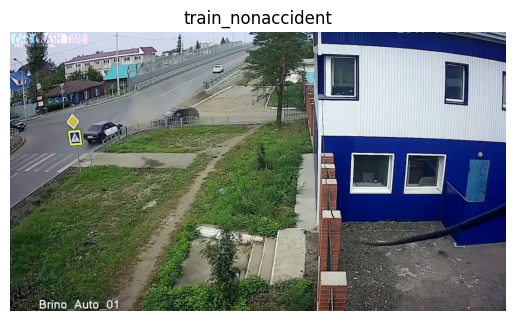

In [ ]:
plot_image("/content/data/train/Non Accident/test14_25.jpg",target_class='train_nonaccident')


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory as Images

In [ ]:
import tensorflow as tf

In [ ]:
images_train_dir = "data/train"
images_test_dir = "data/test"
images_pred_dir = "data/val"

In [ ]:
images_train = Images(images_train_dir,image_size=(224,224),batch_size=32,label_mode='binary')
images_test = Images(images_test_dir,image_size=(224,224),batch_size=32,label_mode='binary')

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [ ]:
CNN = tf.keras.models.Sequential([
      tf.keras.layers.Rescaling(1./255),
      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',padding='valid'),
      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2),
      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=1,activation='sigmoid')
])
CNN.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
history = CNN.fit(images_train,epochs=20,validation_data=images_test)



Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 327ms/step - accuracy: 0.5476 - loss: 0.7159 - val_accuracy: 0.5900 - val_loss: 0.6670
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.6135 - loss: 0.6495 - val_accuracy: 0.6300 - val_loss: 0.6523
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.7047 - loss: 0.5969 - val_accuracy: 0.5800 - val_loss: 0.6718
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.7000 - loss: 0.5291 - val_accuracy: 0.7700 - val_loss: 0.4948
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.8057 - loss: 0.4211 - val_accuracy: 0.7900 - val_loss: 0.4881
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.8571 - loss: 0.3829 - val_accuracy: 0.8600 - val_loss: 0.3571
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.8870 - loss: 0.2876 - val_accuracy: 0.8700 - val_loss: 0.2842
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.8935 - loss: 0.2236 - val_accuracy: 0

<Axes: >

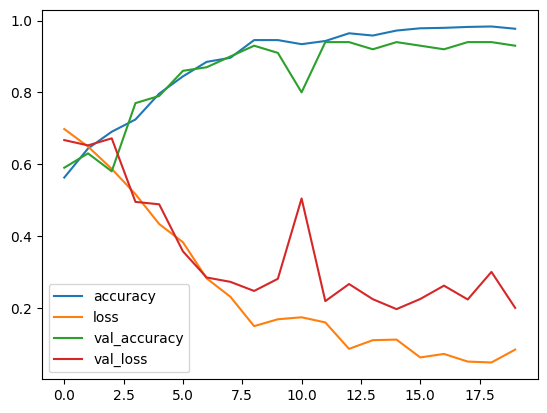

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()


In [ ]:
CNN.save("Accident_model.keras")

In [ ]:
CNN = tf.keras.models.load_model("Accident_model.keras")

In [ ]:
CNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
images_pred = Images(images_pred_dir,image_size=(224,224),batch_size=32)

Found 98 files belonging to 2 classes.
